In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

# Part 1 Data Preparation

### 1.1 Load HDF5 data using Pandas API. The data imported by pandas is a multi-index dataframe where index level 0 is the unique patient encounter identifier and index level 1 is the time of each measurement in units of hours since first measurement

In [2]:
train_data = pd.read_hdf('X_train.hdf')

train_label = pd.read_hdf('y_train.hdf')

test_data = pd.read_hdf('X_test.hdf')

test_label = pd.read_hdf('y_test.hdf')

In [3]:
train_data

ABG Base excess (mEq/L)  ABG FiO2  ABG HCO3 (mEq/L)  \
encounterID absoluteTime                                                        
8           0.000000                          NaN       NaN               NaN   
            0.250000                          NaN       NaN               NaN   
            0.500000                          NaN       NaN               NaN   
            0.583333                          NaN       NaN               NaN   
            0.750000                          NaN       NaN               NaN   
...                                           ...       ...               ...   
16259       87.000000                         NaN       NaN               NaN   
            87.083336                         NaN       NaN               NaN   
            87.666664                         NaN       NaN               NaN   
            88.000000                         NaN       NaN               NaN   
            89.000000                         NaN       NaN               NaN   

                          ABG O2 sat (%)  ABG PCO2 (mmHg)  ABG PO2 (mmHg)  \
encounterID absoluteTime                                                    
8           0.000000                 NaN              NaN             NaN   
            0.250000                 NaN              NaN             NaN   
            0.500000                 NaN              NaN             NaN   
            0.583333                 NaN              NaN             NaN   
            0.750000                 NaN              NaN             NaN   
...                                  ...              ...             ...   
16259       87.000000                NaN              NaN             NaN   
            87.083336                NaN              NaN             NaN   
            87.666664                NaN              NaN             NaN   
            88.000000                NaN              NaN             NaN   
            89.000000                NaN              NaN             NaN   

                          ABG TCO2 (mEq/L)  ABG pH  ALT (SGPT) (units/L)  \
encounterID absoluteTime                                                   
8           0.000000                   NaN     NaN                   NaN   
            0.250000                   NaN     NaN                   NaN   
            0.500000                   NaN     NaN                   NaN   
            0.583333                   NaN     NaN                   NaN   
            0.750000                   NaN     NaN                   NaN   
...                                    ...     ...                   ...   
16259       87.000000                  NaN     NaN                   NaN   
            87.083336                  NaN     NaN                   NaN   
            87.666664                  NaN     NaN                   NaN   
            88.000000                  NaN     NaN                   NaN   
            89.000000                  NaN     NaN                   NaN   

                          AST (SGOT) (units/L)  ...  Vasopressin  Vecuronium  \
encounterID absoluteTime                        ...                            
8           0.000000                       NaN  ...          NaN         NaN   
            0.250000                       NaN  ...          NaN         NaN   
            0.500000                       NaN  ...          NaN         NaN   
            0.583333                       NaN  ...          NaN         NaN   
            0.750000                       NaN  ...          NaN         NaN   
...                                        ...  ...          ...         ...   
16259       87.000000                      NaN  ...          NaN         NaN   
            87.083336                      NaN  ...          NaN         NaN   
            87.666664                      NaN  ...          NaN         NaN   
            88.000000                      NaN  ...          NaN         NaN   
            89.000000

In [4]:
train_data.describe()

,ABG Base excess (mEq/L),ABG FiO2,ABG HCO3 (mEq/L),ABG O2 sat (%),ABG PCO2 (mmHg),ABG PO2 (mmHg),ABG TCO2 (mEq/L),ABG pH,ALT (SGPT) (units/L),AST (SGOT) (units/L),...,Vasopressin,Vecuronium,Ventilator rate (bpm),VerbalResponse,Vitamin E,Volume Tidal,Voriconazole,Weight,White blood cell count (K/uL),deltat
count,18135.000000,7659.000000,18141.000000,18128.000000,18206.000000,18252.000000,18087.000000,18247.000000,10502.000000,10498.000000,...,7389.0,6043.0,209059.000000,272604.000000,712.0,24535.000000,824.0,68143.000000,23509.000000,1.113529e+06
mean,1.035655,49.419632,26.738928,94.736513,46.780018,113.293601,28.148781,7.367772,221.741383,316.536626,...,1.0,1.0,18.875090,2.871599,1.0,7.431834,1.0,22.687481,12.524626,5.066590e-01
std,6.950700,22.441333,7.112518,7.967230,14.752485,65.302661,7.387658,0.104720,663.420754,1182.483767,...,0.0,0.0,7.394335,1.884472,0.0,2.487721,0.0,22.344637,23.764438,3.682103e-01
min,-30.000000,1.000000,0.000000,0.000000,0.000000,2.300000,0.000000,6.500000,3.000000,4.000000,...,1.0,1.0,0.000000,1.000000,1.0,-5.000000,1.0,1.800000,0.030000,0.000000e+00
25%,-3.400000,35.000000,22.000000,94.000000,38.000000,73.000000,23.000000,7.320000,28.000000,37.000000,...,1.0,1.0,13.000000,1.000000,1.0,5.930000,1.0,6.200000,6.550000,1.666667e-01
50%,0.500000,40.000000,26.000000,97.000000,44.000000,97.000000,27.000000,7.380000,51.000000,65.000000,...,1.0,1.0,20.000000,2.000000,1.0,7.390000,1.0,13.000000,10.190000,4.666667e-01
75%,5.200000,60.000000,31.000000,99.000000,52.000000,137.000000,32.000000,7.430000,127.000000,153.000000,...,1.0,1.0,24.000000,5.000000,1.0,8.910000,1.0,34.000000,14.550000,9.833333e-01
max,48.000000,100.000000,96.000000,100.000000,239.000000,722.000000,75.000000,7.760000,12000.000000,22279.000000,...,1.0,1.0,70.000000,5.000000,1.0,31.130000,1.0,183.000000,744.000000,3.966667e+00


### 1.2 Find how many patient encounters there are in the training set; how many timestamps are measured in total; and how many types of measurments are documented

In [5]:
x = len(train_data.groupby(level=0))
print('the number of patient encounters is',x)

the number of patient encounters is 5000


In [6]:
mi = train_data.index
id_array = mi.get_level_values(level =0).to_numpy()

unique_ids = []
for id_val in range(len(id_array)-1):
    if id_array[id_val] != id_array[id_val+1]:
        unique_ids.append(id_array[id_val])
unique_ids.append(id_array[-1])

num = 0
for i in unique_ids:
    x = len(train_data.loc[pd.IndexSlice[i]])
    num += x

print('the total number of timestamps measured is', num)

the total number of timestamps measured is 1113529


In [7]:
x = len(train_data.columns)
print('there are',x,'types of measurements documented')

there are 265 types of measurements documented


### 1.3 For each patient encounter, find how many times measurements have been taken, and plot a histogram showing the number of times each patient encounter is measured

In [8]:
num_time_measurements = []
for i in unique_ids:
    x = len(train_data.loc[pd.IndexSlice[i]])
    num_time_measurements.append(x)

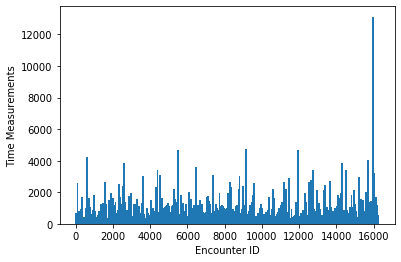

In [9]:
fig, ax = plt.subplots()
ax.bar(unique_ids, num_time_measurements, width=100)

ax.set_xlabel('Encounter ID')
ax.set_ylabel('Time Measurements')

plt.show()

### 1.4 Perform data normalization for all numerical measurements

In [10]:
train_data = (train_data-train_data.min())/(train_data.max()-train_data.min())

In [11]:
train_data.describe()

,ABG Base excess (mEq/L),ABG FiO2,ABG HCO3 (mEq/L),ABG O2 sat (%),ABG PCO2 (mmHg),ABG PO2 (mmHg),ABG TCO2 (mEq/L),ABG pH,ALT (SGPT) (units/L),AST (SGOT) (units/L),...,Vasopressin,Vecuronium,Ventilator rate (bpm),VerbalResponse,Vitamin E,Volume Tidal,Voriconazole,Weight,White blood cell count (K/uL),deltat
count,18135.000000,7659.000000,18141.000000,18128.000000,18206.000000,18252.000000,18087.000000,18247.000000,10502.000000,10498.000000,...,0.0,0.0,209059.000000,272604.000000,0.0,24535.000000,0.0,68143.000000,23509.000000,1.113529e+06
mean,0.397893,0.489087,0.278531,0.947365,0.195732,0.154222,0.375317,0.688708,0.018233,0.014031,...,NaN,NaN,0.269644,0.467900,NaN,0.344086,NaN,0.115273,0.016795,1.277291e-01
std,0.089112,0.226680,0.074089,0.079672,0.061726,0.090736,0.098502,0.083111,0.055299,0.053086,...,NaN,NaN,0.105633,0.471118,NaN,0.068855,NaN,0.123315,0.031943,9.282614e-02
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000e+00
25%,0.341026,0.343434,0.229167,0.940000,0.158996,0.098235,0.306667,0.650794,0.002084,0.001481,...,NaN,NaN,0.185714,0.000000,NaN,0.302519,NaN,0.024283,0.008764,4.201681e-02
50%,0.391026,0.393939,0.270833,0.970000,0.184100,0.131583,0.360000,0.698413,0.004001,0.002738,...,NaN,NaN,0.285714,0.250000,NaN,0.342928,NaN,0.061810,0.013656,1.176471e-01
75%,0.451282,0.595960,0.322917,0.990000,0.217573,0.187161,0.426667,0.738095,0.010336,0.006689,...,NaN,NaN,0.342857,1.000000,NaN,0.384999,NaN,0.177704,0.019517,2.478992e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,1.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000e+00


### 1.5 For each patient encounter, fill in missing data points using forward filling, i.e, use the last measurement for all missing measurements until the next time stamp when another measurement is made. If there was not a previous measurement, fill in missing point(s) by zeros.

In [12]:
train_data = train_data.ffill()
train_data = train_data.fillna(0)

In [13]:
train_data

ABG Base excess (mEq/L)  ABG FiO2  ABG HCO3 (mEq/L)  \
encounterID absoluteTime                                                        
8           0.000000                     0.000000   0.00000          0.000000   
            0.250000                     0.000000   0.00000          0.000000   
            0.500000                     0.000000   0.00000          0.000000   
            0.583333                     0.000000   0.00000          0.000000   
            0.750000                     0.000000   0.00000          0.000000   
...                                           ...       ...               ...   
16259       87.000000                    0.464103   0.20202          0.333333   
            87.083336                    0.464103   0.20202          0.333333   
            87.666664                    0.464103   0.20202          0.333333   
            88.000000                    0.464103   0.20202          0.333333   
            89.000000                    0.464103   0.20202          0.333333   

                          ABG O2 sat (%)  ABG PCO2 (mmHg)  ABG PO2 (mmHg)  \
encounterID absoluteTime                                                    
8           0.000000                0.00         0.000000        0.000000   
            0.250000                0.00         0.000000        0.000000   
            0.500000                0.00         0.000000        0.000000   
            0.583333                0.00         0.000000        0.000000   
            0.750000                0.00         0.000000        0.000000   
...                                  ...              ...             ...   
16259       87.000000               0.89         0.205021        0.073225   
            87.083336               0.89         0.205021        0.073225   
            87.666664               0.89         0.205021        0.073225   
            88.000000               0.89         0.205021        0.073225   
            89.000000               0.89         0.205021        0.073225   

                          ABG TCO2 (mEq/L)    ABG pH  ALT (SGPT) (units/L)  \
encounterID absoluteTime                                                     
8           0.000000                  0.00  0.000000               0.00000   
            0.250000                  0.00  0.000000               0.00000   
            0.500000                  0.00  0.000000               0.00000   
            0.583333                  0.00  0.000000               0.00000   
            0.750000                  0.00  0.000000               0.00000   
...                                    ...       ...                   ...   
16259       87.000000                 0.44  0.730159               0.00175   
            87.083336                 0.44  0.730159               0.00175   
            87.666664                 0.44  0.730159               0.00175   
            88.000000                 0.44  0.730159               0.00175   
            89.000000                 0.44  0.730159               0.00175   

                          AST (SGOT) (units/L)  ...  Vasopressin  Vecuronium  \
encounterID absoluteTime                        ...                            
8           0.000000                   0.00000  ...          0.0         0.0   
            0.250000                   0.00000  ...          0.0         0.0   
            0.500000                   0.00000  ...          0.0         0.0   
            0.583333                   0.00000  ...          0.0         0.0   
            0.750000                   0.00000  ...          0.0         0.0   
...                                        ...  ...          ...         ...   
16259       87.000000                  0.00229  ...          0.0         0.0   
            87.083336                  0.00229  ...          0.0         0.0   
            87.666664                  0.00229  ...          0.0         0.0   
            88.000000                  0.00229  ...          0.0         0.

### 1.6 Set the maximum length of sequence for each patient encounter to the 90th percentile of length. Truncate or zero-pad to the same maximum length for all patient encounter sequences.

In [14]:
percentile = int(np.percentile(num_time_measurements, 90))
print(percentile)

523


In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

id_block_arrays =[]
for i in unique_ids:
    id_block = np.array(train_data.loc[pd.IndexSlice[i]])
    id_block_arrays.append(id_block)

new_data = pad_sequences(id_block_arrays, maxlen = percentile, value = 0, dtype = 'float32')

# Part 2 RNN Model Selection

### 2.1 a baseline LSTM model

#### a) Build a single hidden layer LSTM model with 128 neurons that will take a sequence of data as input, and make a binary prediction on whether a patient can survive

In [19]:
train_label

mortalityResponse
encounterID absoluteTime                   
8           0.000000                      1
            0.250000                      1
            0.500000                      1
            0.583333                      1
            0.750000                      1
...                                     ...
16259       87.000000                     1
            87.083336                     1
            87.666664                     1
            88.000000                     1
            89.000000                     1

[1113529 rows x 1 columns]